In [35]:
# Dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from scipy.stats import sem

In [36]:
# Import the Boston housing data set from sklearn and get description
boston_dataset = load_boston()


In [37]:
# Read Boston housing data into a Pandas dataframe
housing_data = pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)
housing_data['MEDV'] = boston_dataset.target
housing_data.describe(include = 'all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per $10,000

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town

LSTAT % lower status of the population

MEDV Median value of owner-occupied homes in $1000’s

In [38]:
# Create a bunch of samples, each with sample size of 20
sample_set = [housing_data.sample(20) for x in range(0,10)]

In [39]:
# Calculate standard error of means
means = [sample.MEDV.mean() for sample in sample_set]
standard_errors = [sem(sample.MEDV) for sample in sample_set]
x_axis = np.arange(0, len(sample_set), 1) + 1

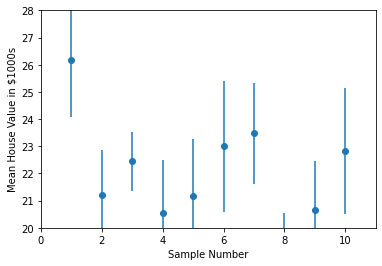

In [40]:
# Plot sample means with error bars
fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, len(sample_set) + 1)
ax.set_ylim(20,28)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean House Value in $1000s")
plt.show()

In [41]:
# Determine which sample's mean is closest to the population mean
pop_mean = housing_data.MEDV.mean()
diff = []
diff[:] = [abs(mean - pop_mean) for mean in means]
print(diff)
print(f"The sample with a mean closest to the population mean is Sample {diff.index(min(diff))+1}.")

[3.652193675889297, 1.3078063241106967, 0.07780632411069277, 1.9778063241106985, 1.372806324110698, 0.47219367588930083, 0.9521936758893013, 3.0228063241107, 1.892806324110694, 0.30719367588930524]
The sample with a mean closest to the population mean is Sample 3.


In [42]:
# Compare to the population mean
print(f"Sample {diff.index(min(diff))+1}'s mean is {means[9]} and the population mean is {pop_mean}.")

Sample 3's mean is 22.840000000000003 and the population mean is 22.532806324110698.
